In [1]:
using Makie

In [3]:
x = range(0.05, stop = 4pi, length = 80)

f1(x) = sin.(x) ./ (1 .+ x)
f2(x) = x.*exp.(-0.5x) .* cos.(x)

y1 = f1(x);
y2 = f2(x);

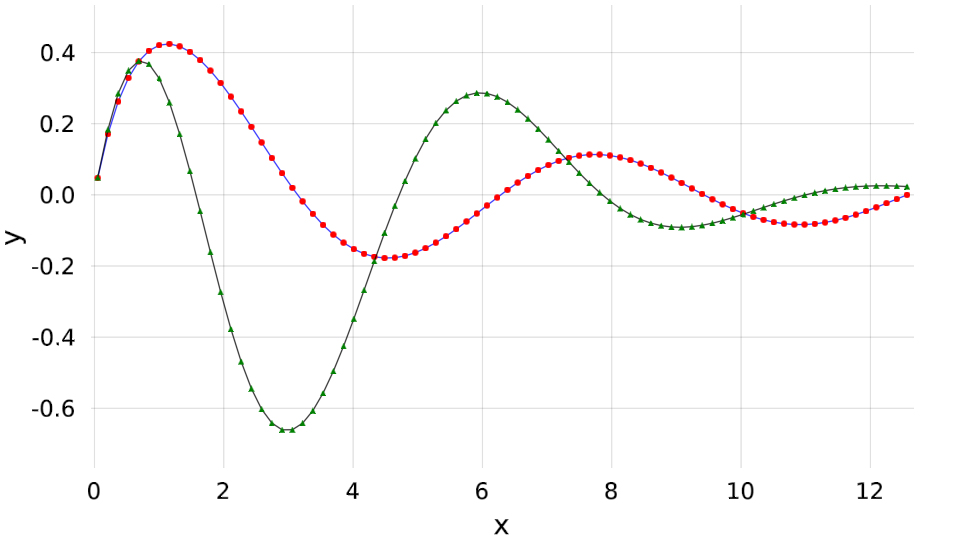

In [7]:
scene = lines(x, y1, color = :blue)
scatter!(scene, x, y1, color = :red, markersize = 0.1)
lines!(scene, x, y2, color = :black)
scatter!(scene, x, y2, color = :green, marker = :utriangle, markersize = 0.1)

---

In [9]:
using RDatasets, DataFrames
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


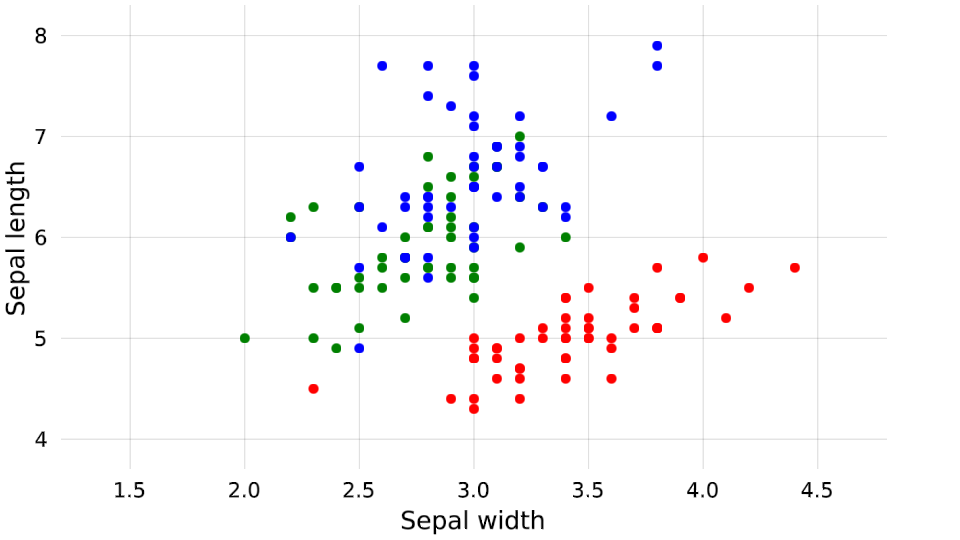

In [10]:
x = iris[:SepalWidth]
y = iris[:SepalLength]

 scene = Scene()
 colors = [:red, :green, :blue]
 i = 1 #color incrementer
 for sp in unique(iris[:Species])
     idx = iris[:Species] .== sp
     sel = iris[idx, [:SepalWidth, :SepalLength]]
     scatter!(scene, sel[:,1], sel[:,2], color = colors[i], limits = FRect(1.5, 4.0, 3.0, 4.0))
     global i = i+1   # (sigh!)
 end

 axis = scene[Axis] # get axis
 axis[:names][:axisnames] = ("Sepal width", "Sepal length")
 scene


---

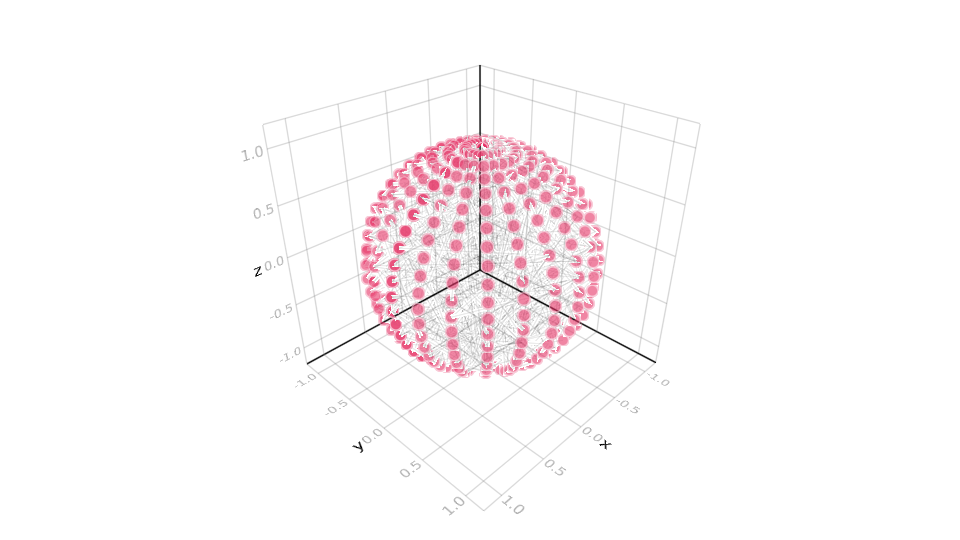

In [11]:
large_sphere = Sphere(Point3f0(0), 1f0)
positions = decompose(Point3f0, large_sphere)
linepos = view(positions, rand(1:length(positions), 1000))
scene = lines(linepos, linewidth = 0.1, color = :black)

scatter!(scene, positions, strokewidth = 10, strokecolor = :white, color = RGBAf0(0.9, 0.2, 0.4, 0.6))
scene